In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv('IMDB Dataset.csv')

In [5]:
data.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [6]:
data.shape

(50000, 3)

In [7]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AYUSH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
def preprocess(sen):
     sentence = sen.lower()

     # Remove html tags
     sentence = remove(sentence)

     # Remove punctuations and numbers
     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

     # Single character removal
     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

     # Remove multiple spaces
     sentence = re.sub(r'\s+', ' ', sentence)

     # Remove Stopwords
     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
     sentence = pattern.sub('', sentence)

     return sentence

In [11]:
X = []
sentences = list(data['review'])
for sen in sentences:
    X.append(preprocess(sen))

In [12]:
Y = data['sentiment']

Y = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y)))

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [15]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

92394

In [16]:
max_len=100
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

In [20]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [21]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


embedding_matrix.shape

(92394, 100)

In [27]:
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

rnn_model.add(embedding_layer)
rnn_model.add(SimpleRNN(128))

rnn_model.add(Dense(1, activation='sigmoid'))

In [28]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9268841 (35.36 MB)
Trainable params: 29441 (115.00 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [29]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [37]:
rnn_model_history = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 22s 89ms/step - loss: 0.6784 - acc: 0.5482 - val_loss: 0.6801 - val_acc: 0.5523
Epoch 2/20
250/250 [==============================] - 24s 98ms/step - loss: 0.6726 - acc: 0.5560 - val_loss: 0.6676 - val_acc: 0.5661
Epoch 3/20
250/250 [==============================] - 23s 93ms/step - loss: 0.6615 - acc: 0.5722 - val_loss: 0.6406 - val_acc: 0.6111
Epoch 4/20
250/250 [==============================] - 22s 87ms/step - loss: 0.6781 - acc: 0.5505 - val_loss: 0.6915 - val_acc: 0.5151
Epoch 5/20
250/250 [==============================] - 22s 87ms/step - loss: 0.6897 - acc: 0.5257 - val_loss: 0.6856 - val_acc: 0.5357
Epoch 6/20
250/250 [==============================] - 22s 88ms/step - loss: 0.6833 - acc: 0.5400 - val_loss: 0.6789 - val_acc: 0.5472
Epoch 7/20
250/250 [==============================] - 22s 88ms/step - loss: 0.6764 - acc: 0.5517 - val_loss: 0.6767 - val_acc: 0.5546
Epoch 8/20
250/250 [==============================] - 22s 88ms

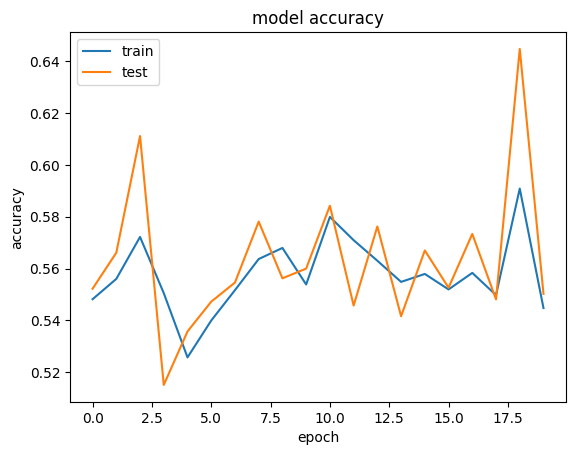

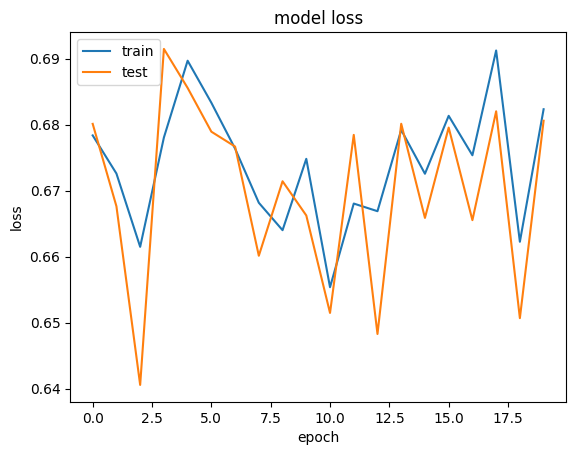

In [38]:
plt.plot(rnn_model_history.history['acc'])
plt.plot(rnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(rnn_model_history.history['loss'])
plt.plot(rnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [40]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [41]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [42]:
lstm_model_history = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 88s 339ms/step - loss: 0.5391 - acc: 0.7281 - val_loss: 0.4304 - val_acc: 0.8061
Epoch 2/10
250/250 [==============================] - 106s 424ms/step - loss: 0.4142 - acc: 0.8157 - val_loss: 0.3735 - val_acc: 0.8357
Epoch 3/10
250/250 [==============================] - 103s 410ms/step - loss: 0.3777 - acc: 0.8350 - val_loss: 0.3774 - val_acc: 0.8328
Epoch 4/10
250/250 [==============================] - 97s 389ms/step - loss: 0.3443 - acc: 0.8526 - val_loss: 0.3318 - val_acc: 0.8602
Epoch 5/10
250/250 [==============================] - 96s 385ms/step - loss: 0.3302 - acc: 0.8603 - val_loss: 0.3312 - val_acc: 0.8566
Epoch 6/10
250/250 [==============================] - 99s 396ms/step - loss: 0.3066 - acc: 0.8707 - val_loss: 0.3821 - val_acc: 0.8457
Epoch 7/10
250/250 [==============================] - 110s 441ms/step - loss: 0.2878 - acc: 0.8813 - val_loss: 0.3569 - val_acc: 0.8466
Epoch 8/10
250/250 [==============================] 

In [43]:
lstm_score = lstm_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", lstm_score[1])

313/313 [==============================] - 19s 62ms/step - loss: 0.3193 - acc: 0.8703
Test Accuracy: 0.8702999949455261


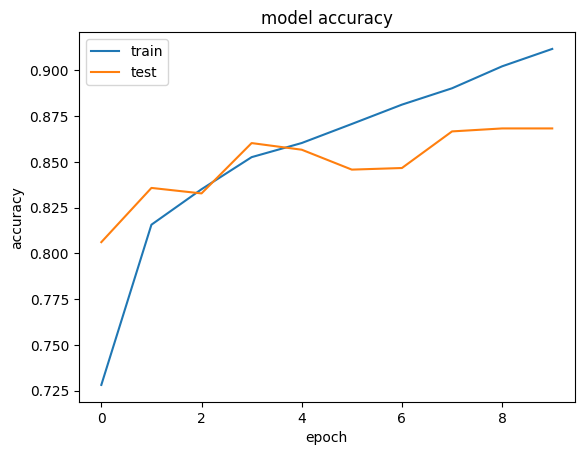

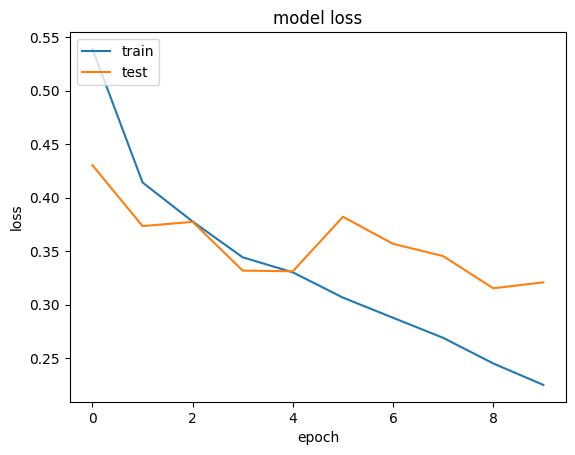

In [44]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [51]:
from sklearn.metrics import classification_report

# Assuming you have trained and evaluated your LSTM model and stored the evaluation results in lstm_score
lstm_score = lstm_model.evaluate(X_test, Y_test, verbose=1)
# Extracting accuracy
accuracy = lstm_score[1]
print("Test Accuracy:", accuracy)

# Predicting probabilities for each class using the LSTM model
y_pred_prob = lstm_model.predict(X_test)

# Converting probabilities into class labels based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generating classification report to get recall and precision
classification_rep = classification_report(Y_test, y_pred)

# Extracting recall and precision from classification report
lines = classification_rep.split('\n')
recall = float(lines[3].split()[3])
precision = float(lines[3].split()[2])

print("Test Recall:", recall)
print("Test Precision:", precision)


313/313 [==============================] - 15s 48ms/step - loss: 0.3193 - acc: 0.8703
Test Accuracy: 0.8702999949455261
313/313 [==============================] - 16s 49ms/step
Test Recall: 0.87
Test Precision: 0.9


In [52]:
from sklearn.metrics import classification_report

# Assuming you have trained and evaluated your RNN model and stored the evaluation results in rnn_score
rnn_score = rnn_model.evaluate(X_test, Y_test, verbose=1)

# Extracting accuracy
accuracy = rnn_score[1]
print("Test Accuracy:", accuracy)

# Predicting probabilities for each class using the RNN model
y_pred_prob = rnn_model.predict(X_test)

# Converting probabilities into class labels based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generating classification report to get recall and precision
classification_rep = classification_report(Y_test, y_pred)

# Extracting recall and precision from classification report
lines = classification_rep.split('\n')
recall = float(lines[3].split()[3])
precision = float(lines[3].split()[2])

print("Test Recall:", recall)
print("Test Precision:", precision)


313/313 [==============================] - 6s 19ms/step - loss: 0.6798 - acc: 0.5484
Test Accuracy: 0.5483999848365784
313/313 [==============================] - 6s 18ms/step
Test Recall: 0.4
Test Precision: 0.3
